In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
((train_images, train_label),(test_images,test_labels))= tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
train_images.shape, train_label.shape,test_images.shape,test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

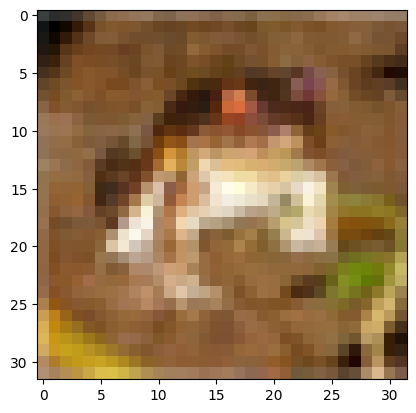

In [5]:
plt.imshow(train_images[0]);

In [7]:
train_label[0]

array([6], dtype=uint8)

In [14]:
set(train_label.flatten())

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [15]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomTranslation(0.1,0.1)
     ]
)

In [17]:
entire_model = tf.keras.Sequential(
    [
        # input
        tf.keras.Input(shape=(32,32,3)),
        # data augmentation
        data_augmentation,
        # CNN
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation="softmax")
     ]
)

In [18]:
entire_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
entire_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
 model_history = entire_model.fit(train_images,train_label,epochs=10,validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.2890 - loss: 1.9203 - val_accuracy: 0.4507 - val_loss: 1.5606
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.4243 - loss: 1.5870 - val_accuracy: 0.5064 - val_loss: 1.3670
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.4624 - loss: 1.4868 - val_accuracy: 0.4978 - val_loss: 1.3867
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.4813 - loss: 1.4392 - val_accuracy: 0.5301 - val_loss: 1.3001
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.4945 - loss: 1.4008 - val_accuracy: 0.5492 - val_loss: 1.2815
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.5113 - loss: 1.3689 - val_accuracy: 0.5639 - val_loss: 1.2193
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.5177 - loss: 1.3479 - val_accuracy: 0.5722 - val_loss: 1.2305
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.5292 -

In [21]:
history = model_history.history

In [22]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

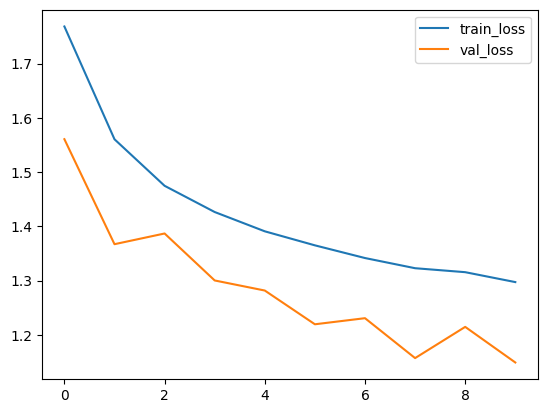

In [23]:

plt.plot(history["loss"],label="train_loss")
plt.plot(history["val_loss"],label="val_loss")
plt.legend()

plt.show()

